<a href="https://colab.research.google.com/github/ProjectToDesenv/PosGraduacao2021-algorithms-DSM4/blob/master/Tributacao_ICMS_RS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introdução, inclusão da Primeira Fase do CRISP-DM

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
lr = LinearRegression()
#%matplotlib inline

#Leitura do arquivo no formato xls
data = pd.DataFrame(pd.read_excel("C:\Repository\Data\Cruzamento_TE_IBGE_Alterado.xls"))

#conversão do arquivo para cvs
data.to_csv ("C:\Repository\Data\Cruzamento_TE_IBGE_Alterado.csv", 
                  index = None,
                  header=True)
  
# show the dataframe
data

,ACEGUA,8889621.64,4942,1798.7902954269528,1551.339,0.687,20.41,26548533.75,23549109.68,51069.07
0,AGUA SANTA,6353422.28,3743,1697.414448,291.503,0.75,69.77,2.589740e+07,2.001253e+07,88151.28
1,AGUDO,10014811.71,16401,610.622018,534.624,0.694,12.42,6.319246e+07,5.136667e+07,30258.08
2,AJURICABA,6669565.67,6987,954.567865,322.674,0.753,14.71,2.639604e+07,2.163098e+07,42299.19
3,ALECRIM,3967990.44,5827,680.966267,316.394,0.672,33.9,2.291728e+07,2.055457e+07,18159.02
4,ALEGRETE,43231709.75,73028,591.988138,7800.428,0.74,13.51,2.250195e+08,1.993194e+08,29467.27
...,...,...,...,...,...,...,...,...,...,...
491,VISTA ALEGRE PRATA,3346332.68,1557,2149.218163,119.327,0.78,100,1.601999e+07,1.363260e+07,34542.61
492,VISTA GAUCHA,4197166.08,2855,1470.110711,90.022,0.757,30.3,1.911249e+07,1.475948e+07,23348.10
493,VITORIA DAS MISSOES,3063351.14,3092,990.734521,258.312,0.655,43.48,1.773749e+07,1.397419e+07,31116.94
494,WESTFALIA,9909135.99,3031,3269.262946,63.665,0.752,32.26,2.461450e+07,2.007073e+07,55984.31


In [6]:
cols = ['municipio', 'repasse-liquido', 'populacao-estimada', 'repasse-perCapta-BC', 'area-territorial', 'idhm', 'mortalidade-infantil','receita-realizada', 'despesa-empenhada', 'pip-percapta']

data = pd.read_csv(r"C:\Repository\Data\Cruzamento_TE_IBGE_Alterado.csv", names=cols)
data.head()

,municipio,repasse-liquido,populacao-estimada,repasse-perCapta-BC,area-territorial,idhm,mortalidade-infantil,receita-realizada,despesa-empenhada,pip-percapta
0,ACEGUA,8889621.64,4942,1798.790295,1551.339,0.687,20.41,26548533.75,23549109.68,51069.07
1,AGUA SANTA,6353422.28,3743,1697.414448,291.503,0.75,69.77,25897400.87,20012529.85,88151.28
2,AGUDO,10014811.71,16401,610.622018,534.624,0.694,12.42,63192464.87,51366673.37,30258.08
3,AJURICABA,6669565.67,6987,954.567865,322.674,0.753,14.71,26396043.14,21630982.89,42299.19
4,ALECRIM,3967990.44,5827,680.966267,316.394,0.672,33.9,22917276.03,20554573.76,18159.02


In [7]:
#Verifica se existe algum registro null
data.isnull().sum()

municipio               0
repasse-liquido         0
populacao-estimada      0
repasse-perCapta-BC     0
area-territorial        0
idhm                    0
mortalidade-infantil    0
receita-realizada       0
despesa-empenhada       0
pip-percapta            0
dtype: int64

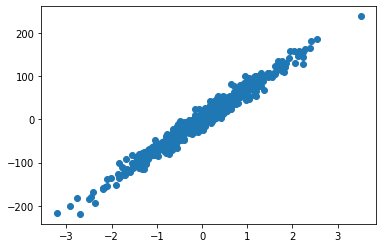

0.9730699321751209


In [9]:
A = data["pip-percapta"]
B = data["repasse-perCapta-BC"]

A, B = make_regression(n_samples = 497, n_features=1, noise=12)

plt.scatter(A,B)
plt.show()

A_treino, A_teste, B_treino, B_teste = train_test_split(A, B, test_size = 0.3)
treino1 = lr.fit(A_treino, B_treino)
resultado1 = lr.score(A_teste, B_teste)
print(resultado1)

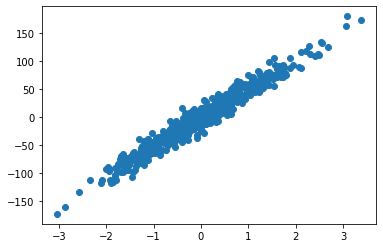

0.9523901228862385


In [10]:
data.head()
L = data[["pip-percapta"]+["idhm"]]
K = data["repasse-perCapta-BC"]
L, K = make_regression(n_samples = 497, n_features=1, noise=12)
plt.scatter(L, K)
plt.show()
L_treino, L_teste, K_treino, K_teste = train_test_split(L, K, test_size = 0.3)
Treino7 = lr.fit(L_treino, K_treino)
resultado7 = lr.score(L_teste, K_teste)
print(resultado7)
